<a href="https://colab.research.google.com/github/MuhammadRaynaldi/Creating-Using-Functions/blob/main/Offshere_baltsyk_Single_Turbine_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Turbine information:

Rated power: 25 kW (7.7 m.s)
Cut in Speed: 2.5 m/s (0.855 kW)
Cut out Speed: 20 m/s (437 kW)

Blade lenght: 7.6 m, A(Swept area): 180 m2, Hub_height = 16 m


In [38]:
windspeed = pd.read_excel('Wind_Speed.xlsx')
windspeed

,YEAR,MO,DY,HR,WS50M
0,2023,1,1,1,13.65
1,2023,1,1,2,13.84
2,2023,1,1,3,12.83
3,2023,1,1,4,12.38
4,2023,1,1,5,11.95
...,...,...,...,...,...
10027,2024,2,22,20,12.19
10028,2024,2,22,21,11.92
10029,2024,2,22,22,11.46
10030,2024,2,22,23,11.28


**Extract the column will be used**

In [39]:
ws = windspeed.iloc[:, 4:5]
ws

,WS50M
0,13.65
1,13.84
2,12.83
3,12.38
4,11.95
...,...
10027,12.19
10028,11.92
10029,11.46
10030,11.28


**Analysing data set in simple statistical information**

In [40]:
ws.describe()

,WS50M
count,10032.000000
mean,7.365701
std,3.458508
min,0.020000
25%,4.930000
50%,7.090000
75%,9.340000
max,24.820000


In [ ]:
#in cas the wind speed data with km/h unit
#def meter_second(x):
  #return x/3.6 #if we have initial data in km per hour, this equation to turn the km/h to m/s

**Calculate energy output using function**

In [41]:
AD = 1.275 # kg/m3 #it depends on hub heights and wind speed
BZ = 0.593
Area = 181 # m2 the sswept area
Eff = 0.8

def wind_p(x): #x = wind speed
  return (0.5*AD*Area*(x**3)*BZ*Eff)/1000 # dividing by 1000 to result in kW unit

Wind_Power = wind_p(ws)
Wind_Power



,WS50M
0,139.219926
1,145.114802
2,115.606809
3,103.864080
4,93.412966
...,...
10027,99.154987
10028,92.711202
10029,82.386736
10030,78.565295


**Rename Column name from WS50M to Power Output**

In [43]:
Wind_Power.rename(columns = {'WS50M':'Power_Output(kW)'}, inplace =True)
Wind_Power

,Power_Output(kW)
0,139.219926
1,145.114802
2,115.606809
3,103.864080
4,93.412966
...,...
10027,99.154987
10028,92.711202
10029,82.386736
10030,78.565295


**Determine Cut in and Cut out based on Power Out Parameter using Wind speed cut in and cut out**

In [45]:
#wind_p(2.5) (cut in power out put)
#wind_p(20) (Cut out power out put)


437.91864

**Conditional Statements**

In [50]:
Wind_Power.loc[(Wind_Power['Power_Output(kW)']>=25)&(Wind_Power['Power_Output(kW)']<437)] = 25 #Rated power
Wind_Power.loc[Wind_Power['Power_Output(kW)']>=437] = 0 #Cut out
Wind_Power.loc[Wind_Power['Power_Output(kW)']<=0.855] = 0 #Cut in


**Power Output Vizualization**

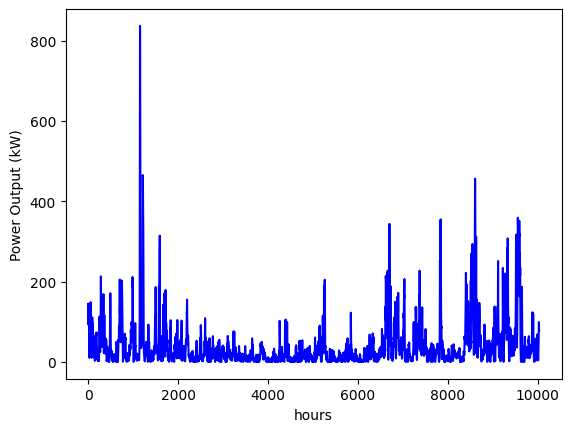

In [47]:
plt.plot(Wind_Power,c = 'b')#Wind_Power data frame, Power_Out(kW) as column inside DF(data frame)
plt.xlabel('hours')
plt.ylabel('Power Output (kW)')
plt.show()

**Power Curve**

In [60]:
DF = pd.concat([Wind_Power,ws],axis =1) #Proses penggabungan (concatination)
DF.sort_values(by=['WS50M'],ascending=True,ignore_index=True,inplace=True)
DF

,Power_Output(kW),WS50M
0,0.0,0.02
1,0.0,0.05
2,0.0,0.06
3,0.0,0.12
4,0.0,0.14
...,...,...
10027,0.0,23.51
10028,0.0,23.63
10029,0.0,24.25
10030,0.0,24.42


**Before Concatenation**

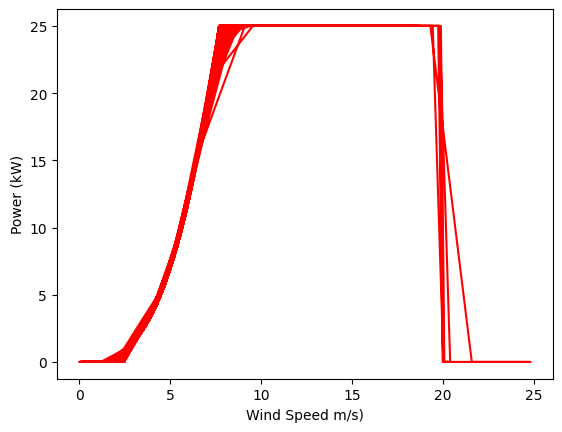

In [51]:
# plt.plot(ws['WS50M'], Wind_Power['Power_Output(kW)'],c = 'r')
# plt.xlabel('Wind Speed m/s)')
# plt.ylabel('Power (kW)')
# plt.show()


**After Concatenation using new data frame as DF**

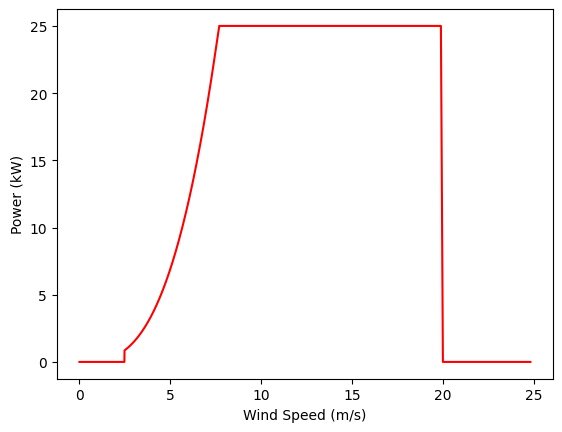

In [62]:
plt.plot(DF['WS50M'], DF['Power_Output(kW)'],c = 'r')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.show()
